In [10]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
from sklearn import datasets
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

# 1- Dataset
Cet ensemble de données se compose de 3 types différents de longueurs de pétales et de sépales d'iris (Setosa, Versicolor et Virginica), stockés dans un numpy.ndarray de 150x4

Les rangées étant les échantillons et les colonnes étant : la longueur des sépales, la largeur des sépales, la longueur des pétales et la largeur des pétales.

Le graphique ci-dessous utilise les deux premières fonctionnalités. Voir ici pour plus d'informations sur cet ensemble de données.
![title](img\iris.png)

len X= (150, 2)
len Y= (150,)


Text(0, 0.5, 'Sepal width')

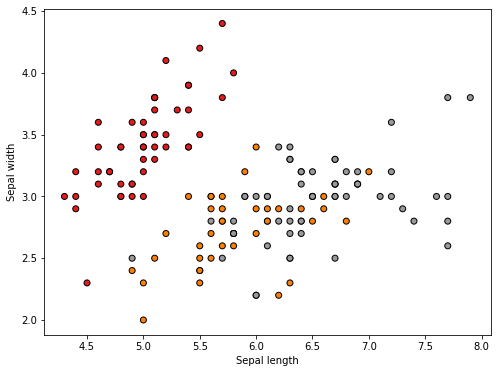

In [3]:
# importer quelque echentions
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
print("len X=",np.shape(X))
print("len Y=",np.shape(Y))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot les points de train
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Mélanger les échantillons du dataset avec la fonction np.random.shuffle

In [12]:
X, Y = shuffle(iris.data, iris.target)

# Calcule de matrice de covariance du data_set
$\mathrm{Cov}$($X_1$,...,$X_n$) est une matrice carré symetrique de dimention d=$dim$($X_i$) tels que :$\newline$               $\mathrm{Cov}$($X_1$,...,$X_n$) =$M_ij$=  $\mathrm{Cov}$($X_i$,$X_j$)=$\mathrm{Cov}$($X_j$,$X_i$)=$E$[($X_i$-$E$($X_i$))($X_j$-$E$($X_j$))]

In [13]:
#fonction pour calculer la matrice de covariance
def cov_matrice(data):
    #dimention de l'échention
    dim=min(np.shape(data))
    #nombre d'échention
    n=max(np.shape(data))
    #initialisation de matrice cov(data)
    cov_data=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            cov_xi_xj=0
            E_xi=0
            E_xj=0
            for p in range(n):
                E_xi+=data[p,i]
                E_xj+=data[p,j]
            E_xi=E_xi/n
            E_xj=E_xj/n
            for p in range(n):
                cov_xi_xj+=(data[p,i]-E_xi)*(data[p,j]-E_xj)
            cov_data[i,j]=cov_xi_xj/n
    return cov_data

In [20]:
cov_iris_data=cov_matrice(iris.data)
print("shape de matrice de covariance de data =",np.shape(cov_iris_data))
print()
print("matrice de covarianec de iris data =")
print(cov_iris_data)

shape de matrice de covariance de data = (4, 4)

matrice de covarianec de iris data =
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


# Diagonalisation de matrice de covariance 
on va diagonaliser la matrice de covariance : $\mathrm{Cov}$($X_1$,...,$X_n$) =$P^{-1}$$D$$P$ avec np.eig et np.diag

In [22]:
D,P= np.linalg.eig(cov_iris_data)
inv_P= np.linalg.inv(P)
print("Les valeur propre de matrice de covariance de data =",D)

Les valeur propre de matrice de covariance de data = [4.20005343 0.24105294 0.0776881  0.02367619]


On prend les deux vecteur propre $V_1$ et $V_2$ associe au deux plus grands valeurs propres $\lambda_1$ =21.27878033 et $\lambda_2$ = 6.53148892
pour verifier les calcule il faut que  $\mathrm{Cov}$($X_1$,...,$X_n$)$V_1$ =$\lambda_1$$V_1$ et $\mathrm{Cov}$($X_1$,...,$X_n$)$V_2$ =$\lambda_2$$V_2$

In [24]:
#verification de diagonalisation
V1=P[:,0]
V2=P[:,1]
lambda_1=D[0]
lambda_2=D[1]
print("cov_data * V1 =",cov_iris_data.dot(V1))
print()
print("lambda_1 * V1 =",lambda_1*V1)
print("______________________________________________________________________________________________________________________")
print("cov_data * V2 =",cov_iris_data.dot(V2))
print()
print("lambda_2 * V2 =",lambda_2*V2)

cov_data * V1 = [ 1.51784299 -0.35499907  3.59806232  1.50483377]

lambda_1 * V1 = [ 1.51784299 -0.35499907  3.59806232  1.50483377]
______________________________________________________________________________________________________________________
cov_data * V2 = [-0.15827266 -0.17600756  0.04179199  0.01819492]

lambda_2 * V2 = [-0.15827266 -0.17600756  0.04179199  0.01819492]


# Réduction de dimention
Pour rédruire la dimention on multiplie notra data par la matrice $V$ = [$V_1$,$V_2$] $\newline$
$IRIS_{d=2}$=$IRIS_{d=4}$X$V$

In [25]:
#concatination de V1 et V2
V=[V1,V2]
V=np.array(V)
print("dim(V)=",np.shape(V))

dim(V)= (2, 4)


In [29]:
iris_data_2=iris.data.dot(V.T)
print("dim(iris_d_2) =",np.shape(iris_data_2))

dim(iris_d_2) = (150, 2)


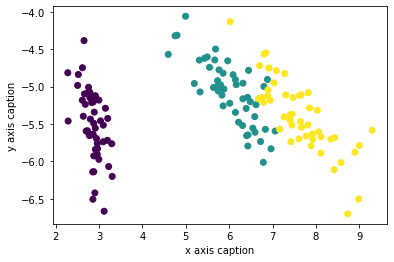

In [31]:
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.scatter(iris_data_2[:,0],iris_data_2[:,1], c=iris.target)
plt.show()